In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

In [2]:
x, sr = librosa.load('audio/simple_loop.wav')
print(x.shape, sr)

(49613,) 22050


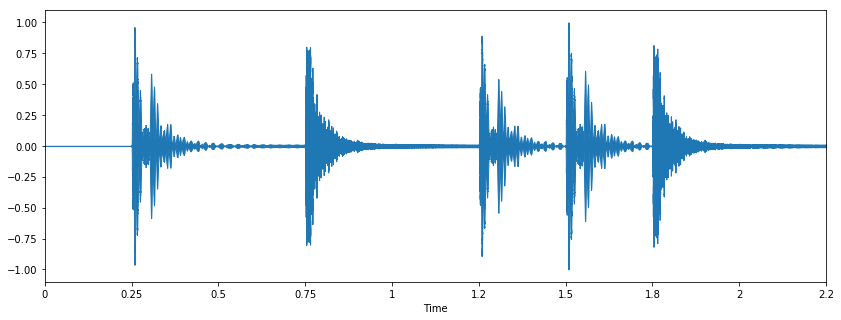

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr)

In [4]:
ipd.Audio(x, rate=sr)

In [5]:
hop_length = 512
frame_length = 1024
rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length).flatten()
rmse_diff = numpy.zeros_like(rmse)
rmse_diff[1:] = numpy.diff(rmse)

In [6]:
print(rmse.shape)
print(rmse_diff.shape)

(97,)
(97,)


In [7]:
energy_novelty = numpy.max([numpy.zeros_like(rmse_diff), rmse_diff], axis=0)

In [8]:
frames = numpy.arange(len(rmse))
t = librosa.frames_to_time(frames, sr=sr)

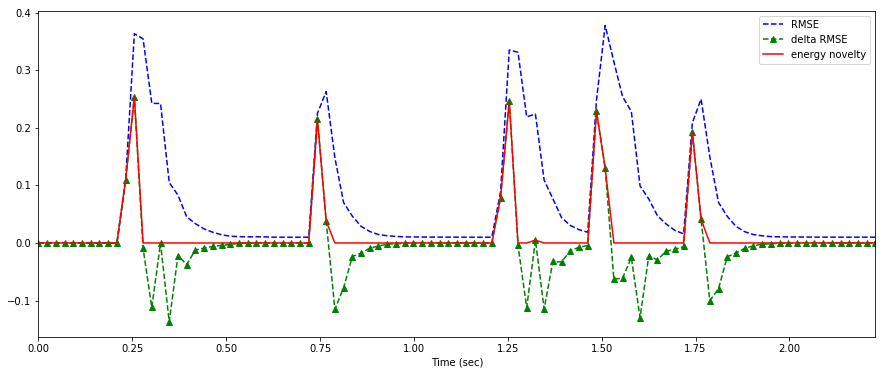

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(t, rmse, 'b--', t, rmse_diff, 'g--^', t, energy_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('RMSE', 'delta RMSE', 'energy novelty')) 

In [10]:
log_rmse = numpy.log1p(10*rmse)
log_rmse_diff = numpy.zeros_like(log_rmse)
log_rmse_diff[1:] = numpy.diff(log_rmse)

In [11]:
log_energy_novelty = numpy.max([numpy.zeros_like(log_rmse_diff), log_rmse_diff], axis=0)

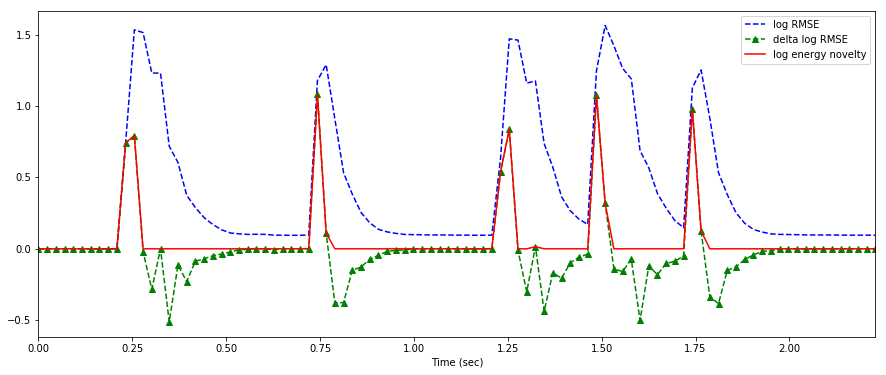

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(t, log_rmse, 'b--', t, log_rmse_diff, 'g--^', t, log_energy_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('log RMSE', 'delta log RMSE', 'log energy novelty')) 

In [13]:
sr = 22050
def generate_tone(midi):
    T = 0.5
    t = numpy.linspace(0, T, int(T*sr), endpoint=False)
    f = librosa.midi_to_hz(midi)
    return numpy.sin(2*numpy.pi*f*t)

In [14]:
x = numpy.concatenate([generate_tone(midi) for midi in [48, 52, 55, 60, 64, 67, 72, 76, 79, 84]])

In [15]:
ipd.Audio(x, rate=sr)

In [16]:
hop_length = 512
frame_length = 1024
rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length).flatten()
rmse_diff = numpy.zeros_like(rmse)
rmse_diff[1:] = numpy.diff(rmse)

In [17]:
energy_novelty = numpy.max([numpy.zeros_like(rmse_diff), rmse_diff], axis=0)

In [18]:
frames = numpy.arange(len(rmse))
t = librosa.frames_to_time(frames, sr=sr)

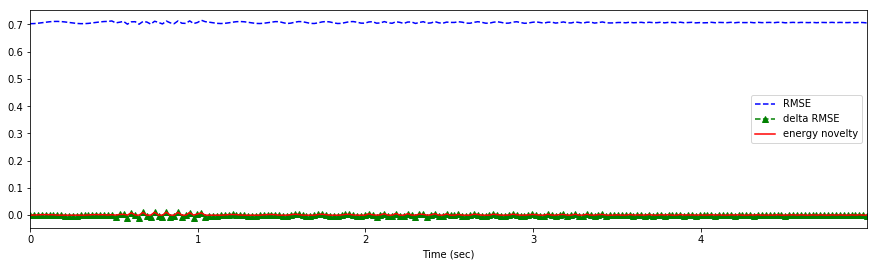

In [19]:
plt.figure(figsize=(15, 4))
plt.plot(t, rmse, 'b--', t, rmse_diff, 'g--^', t, energy_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('RMSE', 'delta RMSE', 'energy novelty')) 

In [20]:
spectral_novelty = librosa.onset.onset_strength(x, sr=sr)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [21]:
frames = numpy.arange(len(spectral_novelty))
t = librosa.frames_to_time(frames, sr=sr)

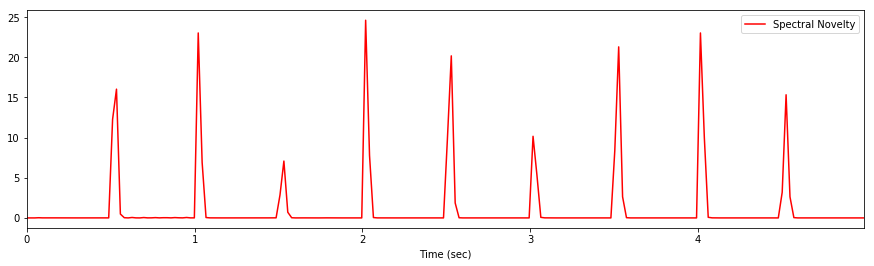

In [22]:
plt.figure(figsize=(15, 4))
plt.plot(t, spectral_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('Spectral Novelty',))

In [23]:
ls audio

 Volume in drive C is Windows
 Volume Serial Number is AE10-1764

 Directory of C:\Users\Kameswar\Documents\Data Science\stanford_mir\audio

22-Jun-18  12:11 PM    <DIR>          .
22-Jun-18  12:11 PM    <DIR>          ..
22-Jun-18  12:11 PM           338,732 125_bounce.wav
22-Jun-18  12:11 PM           364,972 58bpm.wav
22-Jun-18  12:11 PM           911,360 brahms_hungarian_dance_5.mp3
22-Jun-18  12:11 PM         1,022,537 busta_rhymes_hits_for_days.mp3
22-Jun-18  12:11 PM           204,844 c_strum.wav
22-Jun-18  12:11 PM           102,816 clarinet_c6.wav
22-Jun-18  12:11 PM           111,221 classic_rock_beat.mp3
22-Jun-18  12:11 PM           303,086 classic_rock_beat.wav
22-Jun-18  12:11 PM           192,470 conga_groove.wav
22-Jun-18  12:11 PM    <DIR>          drum_samples
22-Jun-18  12:11 PM            71,680 funk_groove.mp3
22-Jun-18  12:11 PM            64,366 jangle_pop.mp3
22-Jun-18  12:11 PM            71,471 latin_groove.mp3
22-Jun-18  12:11 PM            47,294 oboe_c6.wav